# Assignment 7: Dealing with missing data

---
## Background

### Problem Analysis
From Table 8, it is obvious that some data is missing.
1. How should the missing values in the table be treated? You should consider two main cases: a) If
performing the analysis based on the data as it is, do you need to remove people or how would you go about analysing the data, b) If you do not want to remove people, could you “create” data where it is missing and how would you do it (your personal opinion)?
2. Please answer question 1 before continuing. Identify a method in literature for inserting missing data. Use that method to create a complete data set.
3. If using this data set for testing whether the design guidelines resulting in the “good” design is better (which has to be defined formally in a hypothesis) than the “bad design”, what is the impact of the missing data and what is the consequence if “creating” data?
4. Analyze whether the “good” design actually is significantly better than the “bad” design using the complete data set.


### The Methods
Mann-Whitney U Test: Introduced in Assignment 6

---
## Solution

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np


df_8 = pd.read_csv('data/table_8.csv', delimiter=";", header=[1])
df_8.head()

,Participant,Group,Time for identification,Completeness of impact analysis,Correctness of impact analysis,Identification rate,Time for identification.1,Completeness of impact analysis.1,Correctness of impact analysis.1,Identification rate.1
0,P01,B,-,0.545,0.75,-,-,0.238,0.714,-
1,P02,B,-,0.818,1,-,-,0.095,1,-
2,P03,A,20,0.409,1,0.45,25,0.19,1,0.16
3,P04,B,22,0.818,1,0.818,25,0.238,1,0.2
4,P05,B,30,0.909,1,0.667,35,0.476,0.909,0.286


### 7.1 How to treat missing values?
Perfomring the data as is does not work, as the tests (known to me) don't work on missing data. Hence we would either need to remove or fabricate data.

**Removing**  
If we removed all participant with missing values, the dataset itself would only consist of 17 participants, effectively dividing the dataset in half and reducing the statistical power immensly (assuming the data removed was still of high quality).  

Another approach would be to include for each variable only those participants that have a value in both designs to enable comparison without losing too many participants.  

**Fabricating**  
I see multiple ways:
1. Take a statistical value such as the mean or the median as the default value for all missing entries
2. Analyse, whether there is a linear correlation between some of the variables in each design individually, fit a regression model and predict those values
3. Check if the existing values for that variable follow a certain distribution and randomly assign values from that distribution to the missing entries

Of course, all of those approaches impact how much we trust in the outcomes of our further statistical analyses.

### 7.2 Create a complete dataset
The easiest way to fill in the missing values is by using the mean, median or mode depending on the context.  
The mean should be used when the data is somewhat symmetrically distributed and does not contain outliers. -> We check for outliers with the z-score.  
The median should be used when the data contains outliers.
The mode should be used when the data is categorical -> Since non of the data is categorical, we will not use mode.

In [2]:
variables = ['Time for identification', 'Completeness of impact analysis', 'Correctness of impact analysis', 'Identification rate']
for column in variables:
    # Convert columns to numeric, forcing errors to NaN
    df_8[column] = pd.to_numeric(df_8[column], errors='coerce')
    
    # Calculate z-scores
    z_scores = np.abs(stats.zscore(df_8[column].dropna()))

    for z_score in z_scores:
        if z_score > 3:
            print(column)

Correctness of impact analysis


**Interpretation**  
Since one of the variables contains an outlier, we use the median to fill missing values

In [3]:
for column in df_8.columns[2:]:
    med = df_8[column].replace('-', np.NaN).astype(float).median()
    df_8[column] = df_8[column].fillna(med).replace('-', med)

df_8

,Participant,Group,Time for identification,Completeness of impact analysis,Correctness of impact analysis,Identification rate,Time for identification.1,Completeness of impact analysis.1,Correctness of impact analysis.1,Identification rate.1
0,P01,B,30.0,0.545,0.750,0.621,30.0,0.238,0.714,0.267
1,P02,B,30.0,0.818,1.000,0.621,30.0,0.095,1,0.267
2,P03,A,20.0,0.409,1.000,0.450,25,0.19,1,0.16
3,P04,B,22.0,0.818,1.000,0.818,25,0.238,1,0.2
4,P05,B,30.0,0.909,1.000,0.667,35,0.476,0.909,0.286
5,P07,A,30.0,0.000,1.000,0.621,38,0.476,1,0.263
6,P09,A,30.0,0.455,1.000,0.621,30.0,0.476,1,0.267
7,P10,B,30.0,0.409,0.900,0.621,30.0,0.381,1,0.267
8,P11,A,45.0,0.545,0.923,0.267,50,0.714,1,0.3
9,P12,B,30.0,0.773,1.000,0.621,30.0,0.714,1,0.267


### 7.3 What is the impact of creating data on the evaluation of the impact of good design on variables?
Let start by formally defining the hypotheses:  
$H_0$: The design does not have a significant impact on variable X  
$H_1$: The design has a significant impact on variable X

This will only show us if there is a significant difference. To understand whether the "good" design positively impacted the variable, we have to look at the actual values (for some variables, higher is better, for some smaller is better).  
We use the non-parametrized Mann-Whitney U Test again to compare the two designs.

In [4]:
for variable in variables:
    u, p = stats.mannwhitneyu(df_8[variable].astype(float), df_8[variable + '.1'].astype(float))
    print('Mann-Whitney U Test u: {}, p: {} for variable: {}'.format(u, p, variable))


Mann-Whitney U Test u: 493.0, p: 0.47810923615342693 for variable: Time for identification
Mann-Whitney U Test u: 842.0, p: 0.00013629129560050265 for variable: Completeness of impact analysis
Mann-Whitney U Test u: 623.5, p: 0.18053599466624148 for variable: Correctness of impact analysis
Mann-Whitney U Test u: 935.0, p: 4.0919886195215734e-07 for variable: Identification rate


The only variable for which we can reject the null hypothesis is `Completeness of impact analysis`.
Here, the higher the value, the better. Hence we quickly visualize the variable for both designs.

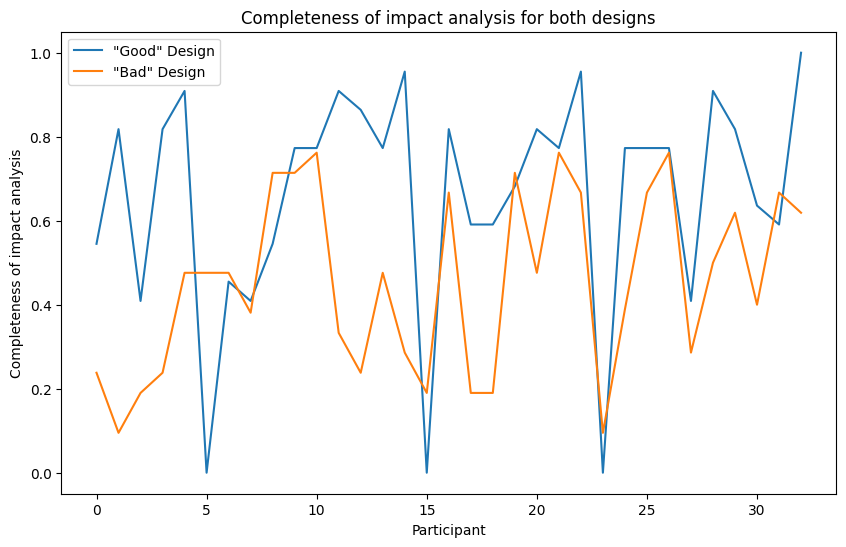

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_8['Completeness of impact analysis'].astype(float), label='"Good" Design')
plt.plot(df_8['Completeness of impact analysis.1'].astype(float), label='"Bad" Design')
plt.xlabel('Participant')
plt.ylabel('Completeness of impact analysis')
plt.title('Completeness of impact analysis for both designs')
plt.legend()
plt.show()

**Interpretation**  
As we can see, the "good" design has consistently higher values than the bad design, hence the design has a significant effect on the completeness of impact analysis - if we analyze the dataset with the added data.

Now, we look at the dataset without any added data to check if we would find the same significance.

In [6]:
df_8 = pd.read_csv('data/table_8.csv', delimiter=";", header=[1])

In [7]:
df_8.replace('-', np.nan, inplace=True)
df_8.dropna(inplace=True)
df_8.reset_index(drop=True, inplace=True)
df_8

,Participant,Group,Time for identification,Completeness of impact analysis,Correctness of impact analysis,Identification rate,Time for identification.1,Completeness of impact analysis.1,Correctness of impact analysis.1,Identification rate.1
0,P03,A,20,0.409,1,0.45,25,0.19,1,0.16
1,P04,B,22,0.818,1,0.818,25,0.238,1,0.2
2,P05,B,30,0.909,1,0.667,35,0.476,0.909,0.286
3,P11,A,45,0.545,0.923,0.267,50,0.714,1,0.3
4,P13,A,40,0.773,1,0.425,40,0.762,1,0.4
5,P14,B,30,0.909,1,0.667,30,0.333,0.875,0.233
6,P19,A,29,0.818,1,0.621,27,0.667,1,0.519
7,P20,A,9,0.591,1,1.444,15,0.19,0.8,0.267
8,P21,B,20,0.591,1,0.65,35,0.19,1,0.114
9,P22,B,30,0.682,1,0.5,20,0.714,1,0.75


In [8]:
for variable in variables:
    u, p = stats.mannwhitneyu(df_8[variable].astype(float), df_8[variable + '.1'].astype(float))
    print('Mann-Whitney U Test u: {}, p: {} for variable: {}'.format(u, p, variable))

Mann-Whitney U Test u: 136.5, p: 0.7948014096001434 for variable: Time for identification
Mann-Whitney U Test u: 218.0, p: 0.011672197183916728 for variable: Completeness of impact analysis
Mann-Whitney U Test u: 167.5, p: 0.3359037248521225 for variable: Correctness of impact analysis
Mann-Whitney U Test u: 209.0, p: 0.02742623743475122 for variable: Identification rate


**Interpretation**  
If we only work with the complete data, we will find another variable that seems to be significantly impacted by the design: `Identification rate`. Again, we print this variable to determine whether the "good" design has a positiv impact (reflected in a higher value)

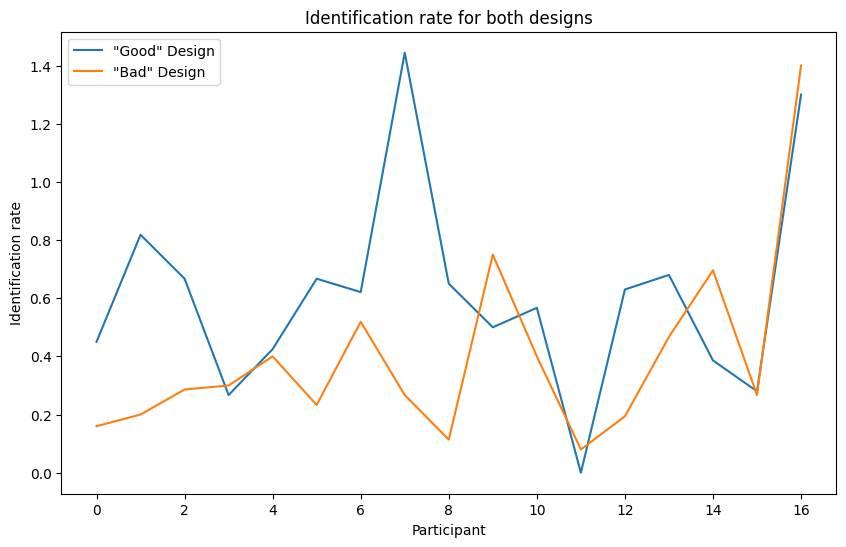

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_8['Identification rate'].astype(float), label='"Good" Design')
plt.plot(df_8['Identification rate.1'].astype(float), label='"Bad" Design')
plt.xlabel('Participant')
plt.ylabel('Identification rate')
plt.title('Identification rate for both designs')
plt.legend()
plt.show()

**Interpretation**  
Also here, the data highlights the positive impact of the "good" design.
To answer the question: By "faking" data with the median, we overlooked one variable that seems to be affected by the design choice. However, this might also just be an artifact of a little dataset.

### 7.4 Analyze the effect of the good design with the entire dataset
See 7.3. already done there